In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# To read data 

In [2]:
df=pd.read_csv(r'C:\Users\Paresh H Waikar\Desktop\DATA SCIENCE\insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [8]:
print('Shape of data =',df.shape)

Shape of data = (1338, 7)


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking for missing values

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# under standing the data

In [23]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
num_features = df.dtypes[df.dtypes != 'object'].index
print(num_features)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [24]:
df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
cat_features = df.dtypes[df.dtypes == 'object'].index
print(cat_features)

Index(['sex', 'smoker', 'region'], dtype='object')


In [30]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [31]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [32]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [34]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [36]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [37]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# data cleaning

In [38]:
df.shape

(1338, 7)

In [39]:
df = df.drop_duplicates()

In [40]:
df.shape

(1337, 7)

In [41]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data visualization

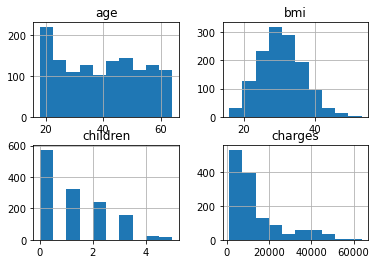

In [46]:
df.hist()
plt.show()

# converting categorical variable to numerical variable by get_dummies() method

In [68]:
dummies = pd.get_dummies(df.sex)
print(dummies)

      female  male
0          1     0
1          0     1
2          0     1
3          0     1
4          0     1
...      ...   ...
1333       0     1
1334       1     0
1335       1     0
1336       1     0
1337       1     0

[1337 rows x 2 columns]


In [58]:
merged = pd.concat([df,dummies],axis = 1)
print(merged)

      age     sex     bmi  children smoker     region      charges  female  \
0      19  female  27.900         0    yes  southwest  16884.92400       1   
1      18    male  33.770         1     no  southeast   1725.55230       0   
2      28    male  33.000         3     no  southeast   4449.46200       0   
3      33    male  22.705         0     no  northwest  21984.47061       0   
4      32    male  28.880         0     no  northwest   3866.85520       0   
...   ...     ...     ...       ...    ...        ...          ...     ...   
1333   50    male  30.970         3     no  northwest  10600.54830       0   
1334   18  female  31.920         0     no  northeast   2205.98080       1   
1335   18  female  36.850         0     no  southeast   1629.83350       1   
1336   21  female  25.800         0     no  southwest   2007.94500       1   
1337   61  female  29.070         0    yes  northwest  29141.36030       1   

      male  
0        0  
1        1  
2        1  
3        1 

In [60]:
df1 = merged.drop(['sex','female'],axis=1)
print(df1)

      age     bmi  children smoker     region      charges  male
0      19  27.900         0    yes  southwest  16884.92400     0
1      18  33.770         1     no  southeast   1725.55230     1
2      28  33.000         3     no  southeast   4449.46200     1
3      33  22.705         0     no  northwest  21984.47061     1
4      32  28.880         0     no  northwest   3866.85520     1
...   ...     ...       ...    ...        ...          ...   ...
1333   50  30.970         3     no  northwest  10600.54830     1
1334   18  31.920         0     no  northeast   2205.98080     0
1335   18  36.850         0     no  southeast   1629.83350     0
1336   21  25.800         0     no  southwest   2007.94500     0
1337   61  29.070         0    yes  northwest  29141.36030     0

[1337 rows x 7 columns]


In [70]:
dummies1 = pd.get_dummies(df1.smoker)
print(dummies1)

      no  yes
0      0    1
1      1    0
2      1    0
3      1    0
4      1    0
...   ..  ...
1333   1    0
1334   1    0
1335   1    0
1336   1    0
1337   0    1

[1337 rows x 2 columns]


In [71]:
merged1 = pd.concat([df1,dummies1],axis = 1)
print(merged1)

      age     bmi  children smoker     region      charges  male  no  yes
0      19  27.900         0    yes  southwest  16884.92400     0   0    1
1      18  33.770         1     no  southeast   1725.55230     1   1    0
2      28  33.000         3     no  southeast   4449.46200     1   1    0
3      33  22.705         0     no  northwest  21984.47061     1   1    0
4      32  28.880         0     no  northwest   3866.85520     1   1    0
...   ...     ...       ...    ...        ...          ...   ...  ..  ...
1333   50  30.970         3     no  northwest  10600.54830     1   1    0
1334   18  31.920         0     no  northeast   2205.98080     0   1    0
1335   18  36.850         0     no  southeast   1629.83350     0   1    0
1336   21  25.800         0     no  southwest   2007.94500     0   1    0
1337   61  29.070         0    yes  northwest  29141.36030     0   0    1

[1337 rows x 9 columns]


In [73]:
df2 = merged1.drop(['smoker','no'],axis = 1)
print(df2)

      age     bmi  children     region      charges  male  yes
0      19  27.900         0  southwest  16884.92400     0    1
1      18  33.770         1  southeast   1725.55230     1    0
2      28  33.000         3  southeast   4449.46200     1    0
3      33  22.705         0  northwest  21984.47061     1    0
4      32  28.880         0  northwest   3866.85520     1    0
...   ...     ...       ...        ...          ...   ...  ...
1333   50  30.970         3  northwest  10600.54830     1    0
1334   18  31.920         0  northeast   2205.98080     0    0
1335   18  36.850         0  southeast   1629.83350     0    0
1336   21  25.800         0  southwest   2007.94500     0    0
1337   61  29.070         0  northwest  29141.36030     0    1

[1337 rows x 7 columns]


In [75]:
dummies2 = pd.get_dummies(df2.region)
print(dummies2)

      northeast  northwest  southeast  southwest
0             0          0          0          1
1             0          0          1          0
2             0          0          1          0
3             0          1          0          0
4             0          1          0          0
...         ...        ...        ...        ...
1333          0          1          0          0
1334          1          0          0          0
1335          0          0          1          0
1336          0          0          0          1
1337          0          1          0          0

[1337 rows x 4 columns]


In [76]:
merged2 = pd.concat([df2,dummies2],axis = 1)
print(merged2)

      age     bmi  children     region      charges  male  yes  northeast  \
0      19  27.900         0  southwest  16884.92400     0    1          0   
1      18  33.770         1  southeast   1725.55230     1    0          0   
2      28  33.000         3  southeast   4449.46200     1    0          0   
3      33  22.705         0  northwest  21984.47061     1    0          0   
4      32  28.880         0  northwest   3866.85520     1    0          0   
...   ...     ...       ...        ...          ...   ...  ...        ...   
1333   50  30.970         3  northwest  10600.54830     1    0          0   
1334   18  31.920         0  northeast   2205.98080     0    0          1   
1335   18  36.850         0  southeast   1629.83350     0    0          0   
1336   21  25.800         0  southwest   2007.94500     0    0          0   
1337   61  29.070         0  northwest  29141.36030     0    1          0   

      northwest  southeast  southwest  
0             0          0         

In [77]:
df3 = merged2.drop(['region','northeast'],axis = 1)
print(df3)

      age     bmi  children      charges  male  yes  northwest  southeast  \
0      19  27.900         0  16884.92400     0    1          0          0   
1      18  33.770         1   1725.55230     1    0          0          1   
2      28  33.000         3   4449.46200     1    0          0          1   
3      33  22.705         0  21984.47061     1    0          1          0   
4      32  28.880         0   3866.85520     1    0          1          0   
...   ...     ...       ...          ...   ...  ...        ...        ...   
1333   50  30.970         3  10600.54830     1    0          1          0   
1334   18  31.920         0   2205.98080     0    0          0          0   
1335   18  36.850         0   1629.83350     0    0          0          1   
1336   21  25.800         0   2007.94500     0    0          0          0   
1337   61  29.070         0  29141.36030     0    1          1          0   

      southwest  
0             1  
1             0  
2             0  
3  

In [142]:
df3.corr()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


<AxesSubplot:>

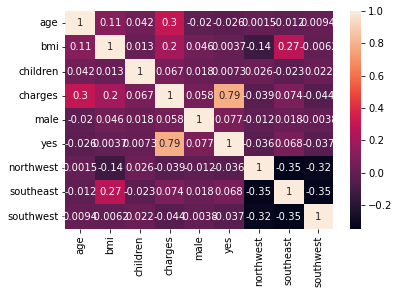

In [144]:
sns.heatmap(df3.corr(),annot=True)

In [145]:
df3.describe()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.204936,0.242334,0.272251,0.243082
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,0.428655,0.445285,0.429104
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
df3.shape

(1337, 9)

In [84]:
X = df3[['age','bmi','children','male','yes','northwest','southeast','southwest']] 
X.head()

,age,bmi,children,male,yes,northwest,southeast,southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [85]:
y = y = df3[['charges']]
y.head(5)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


# create train and test data set

In [86]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [87]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1069, 8)
X_test dimension=  (268, 8)
y_train dimension=  (1069, 1)
y_train dimension=  (268, 1)


In [89]:
 from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [94]:
print('coef= ', lr.coef_)
print('intercept= ', lr.intercept_)
print('score= ', lr.score(X_test,y_test))
print('score= ', lr.score(X_train,y_train))

coef=  [[  248.21072022   318.70144095   533.0099888   -101.54205399
  23077.76459287  -391.76145478  -838.91961573  -659.13975155]]
intercept=  [-11092.65229595]
score=  0.8069287081198013
score=  0.7299057809339075


In [108]:
from sklearn.metrics import r2_score

In [109]:
r2_score = r2_score(y_test, y_pred)
print('r2 score is',r2_score)

r2 score is 0.8069287081198013


In [133]:
from sklearn import metrics

In [137]:
print('mean_absolute error is =',metrics.mean_absolute_error(y_test,y_pred))
print('mean_sqrd_error is=',metrics.mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is=',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))


mean_absolute error is = 4177.045561036318
mean_sqrd_error is= 35478020.675235584
root_mean_squared error of is= 64.63006700473332


In [139]:
lr.predict([[19,27.900,0,0,1,0,0,1]])

array([[24933.74643221]])